In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline 

In [2]:
#Load numpy archives from data directory 

clocks = np.load("data/full_numpy_bitmap_alarm clock.npy")
clocks = clocks.reshape((-1, 28, 28))

bears = np.load("data/full_numpy_bitmap_bear.npy")
bears = bears.reshape((-1, 28, 28))

In [3]:
#Check data shape
clocks.shape
bears.shape

(134762, 28, 28)

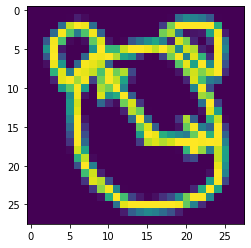

In [4]:
#Example from clocks
plt.imshow(clocks[0])

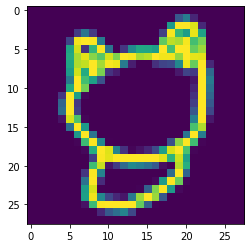

In [5]:
#Example from bears
plt.imshow(bears[0])

In [6]:
#Create training dataset
CATEGORIES = ["alarm clock", "bear"]

training = []

testing = []

a1, a2 = clocks[:clocks.shape[0]//2], clocks[clocks.shape[0]//2:]

b1, b2 = bears[:bears.shape[0]//2], bears[bears.shape[0]//2:]

for i in a1:
    training.append([i, 0])
    
for i in b1:
    training.append([i, 1])
    


In [7]:
#Shuffle dataset
import random
random.shuffle(training)

for i in training[:50]:
    print(i[1])

0
0
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
1
0
0
1
0


In [8]:
#Turn training dataset into labelled numpy arrays
x_train, y_train = [], []

for i, l in training:
    x_train.append(i)
    y_train.append(l)
    
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
y_train = np.array(y_train)

In [9]:
#Create model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
        ])
  
model.compile(optimizer="adam",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])
  



In [10]:
#Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
4034/4034 [==============================] - 8s 2ms/step - loss: 2.7175 - accuracy: 0.7221
Epoch 2/10
4034/4034 [==============================] - 7s 2ms/step - loss: 0.3787 - accuracy: 0.8336
Epoch 3/10
4034/4034 [==============================] - 7s 2ms/step - loss: 0.3260 - accuracy: 0.8632
Epoch 4/10
4034/4034 [==============================] - 6s 2ms/step - loss: 0.2924 - accuracy: 0.8809
Epoch 5/10
4034/4034 [==============================] - 6s 2ms/step - loss: 0.2770 - accuracy: 0.8868
Epoch 6/10
4034/4034 [==============================] - 6s 2ms/step - loss: 0.2620 - accuracy: 0.8919
Epoch 7/10
4034/4034 [==============================] - 6s 2ms/step - loss: 0.2532 - accuracy: 0.8953
Epoch 8/10
4034/4034 [==============================] - 6s 2ms/step - loss: 0.2437 - accuracy: 0.8989
Epoch 9/10
4034/4034 [==============================] - 7s 2ms/step - loss: 0.2363 - accuracy: 0.9028
Epoch 10/10
4034/4034 [==============================] - 8s 2ms/step - loss: 0.229

In [11]:
#Create testing dataset
for i in a2:
    testing.append([i, 0])
    
for i in b2:
    testing.append([i, 1])
    
random.shuffle(testing)

x_test, y_test = [], []

for i, l in testing:
    x_test.append(i)
    y_test.append(l)
    
x_test = np.array(x_test).reshape((-1, 28, 28, 1))
y_test = np.array(y_test)

In [12]:
#Check model performance on testing dataset
model.evaluate(x_test, y_test)

4034/4034 [==============================] - 4s 899us/step - loss: 0.3364 - accuracy: 0.8882


[0.33641621470451355, 0.8881787657737732]

In [13]:
#See network perform on specific data
predictions = model.predict(x_test)

1
1


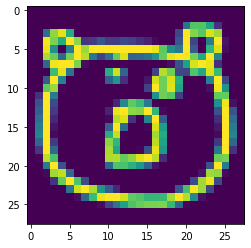

In [14]:
#Run this cell to see a random element of the testing set and  model prediction
sample = random.randint(0, 4033)


print(np.argmax(predictions[sample]))
print(y_test[sample])

plt.imshow(x_test[sample])

In [17]:
model.save("saved_models/test.h5")